In [165]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

### data - all attributes included

In [123]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv.xls')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [124]:
# encode object values
obj_list = data.select_dtypes(include='object').columns
obj_list

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [127]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [128]:
X = data.iloc[:, 1:-1].values # get all data with columns except for stroke column
y = data.iloc[:, -1].values # get stroke column and its data ONLY

In [129]:
# bmi NA values (fill with median values)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, -2:])
X[:, -2:] = imputer.transform(X[:, -2:])

### data - only necessary values

In [169]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv.xls')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [170]:
data = data.dropna().reset_index()
len(data)

4909

In [171]:
data = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

In [172]:
# encode object values
obj_list = data.select_dtypes(include='object').columns
obj_list

Index(['smoking_status'], dtype='object')

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

In [176]:
X = data.drop('stroke', axis=1) # get all data with columns except for stroke column
y = data['stroke'] # get stroke column and its data ONLY

## preparing data for training

In [177]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [178]:
# feature scaling (normalize)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [179]:
# Scikit-Learn modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

## base model

In [180]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

scores = {}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        scores[model_name] = model.score(X_test, y_test)
        
    return scores

In [181]:
scores_of_models = fit_score(models, X_train, X_test, y_train, y_test)

In [182]:
model_compare = pd.DataFrame(scores_of_models, index=['accuracy'])
model_compare.T

,accuracy
Logistic Regression,0.946029
KNN,0.942974
Random Forest,0.946029


### random forest

In [183]:
rf_clf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=42)

In [184]:
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[926   3]
 [ 52   1]]


0.9439918533604889

### RandomizedSearchCV

In [185]:
# KNN tuning
train_scores, test_scores = [], []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))
    
print(f"Max KNN training score: {np.max(train_scores)*100:.2f}% with n_neighbors of {np.argmax(train_scores)+1}.")
print(f"Max KNN testing score: {np.max(test_scores)*100:.2f}% with n_neighbors of {np.argmax(test_scores)+1}.")

Max KNN training score: 100.00% with n_neighbors of 1.
Max KNN testing score: 94.70% with n_neighbors of 13.


In [186]:
# LogReg tuning
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ['liblinear']}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions=log_reg_grid,
                                     cv=5,
                                     n_iter=20,
                                     verbose=1)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [187]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [188]:
rs_log_reg.score(X_test, y_test)

0.9460285132382892

### GridSearchCV

In [189]:
# LogReg tuning
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                                     param_grid=log_reg_grid,
                                     cv=5,
                                     verbose=1)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=1)

In [190]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [191]:
gs_log_reg.score(X_test, y_test)

0.9460285132382892

## feature importance

In [192]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [193]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [194]:
clf.coef_

array([[1.49220513, 0.1203996 , 0.07244338, 0.24293043, 0.0187108 ,
        0.11513781]])

In [195]:
feature_importance = dict(zip(data.columns, list(clf.coef_[0])))
feature_importance

{'age': 1.4922051294943142,
 'hypertension': 0.12039959921321715,
 'heart_disease': 0.07244338150434973,
 'avg_glucose_level': 0.24293042644036703,
 'bmi': 0.018710797859408705,
 'smoking_status': 0.11513781144650345}

<AxesSubplot:title={'center':'Feature Importance'}>

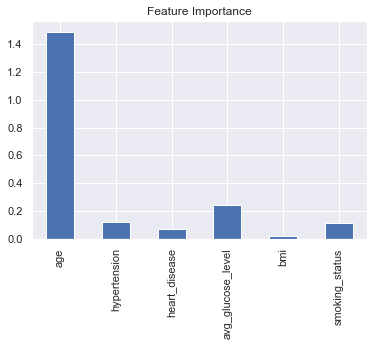

In [196]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

### cross-val

In [217]:
clf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=42)
cv_acc = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

cross-val accuracy (mean): 95.36%


In [218]:
cv_rec = cross_val_score(clf, X_train, y_train, cv=5)
print(f"cross-val recall (mean): {np.mean(cv_rec)*100:.2f}%")

cross-val recall (mean): 95.85%


In [219]:
cv_pre = cross_val_score(clf, X_train, y_train, scoring='precision')
print(f"cross-val recall (mean): {np.mean(cv_pre)*100:.2f}%")

cross-val recall (mean): 26.67%


In [220]:
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
print(f"cross-val f1 (mean): {np.mean(cv_f1)*100:.2f}%")

cross-val f1 (mean): 3.47%


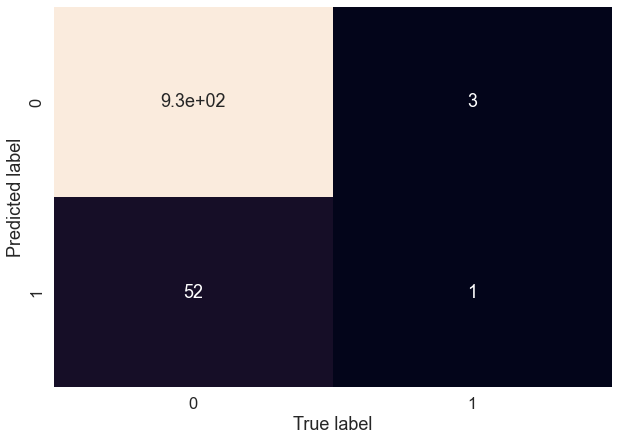

In [214]:
# Confusion matrix
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

clf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

### classification report

In [215]:
clf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.25      0.02      0.04        53

    accuracy                           0.94       982
   macro avg       0.60      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982

